In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
data=pd.read_csv("/content/CloudWatch_Traffic_Web_Attack.csv")
data

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


In [7]:
data.tail()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
281,9032,5862,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,147.161.131.1,AT,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [9]:
data.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

In [14]:
colmn = ['src_ip','src_ip_country_code','protocol','dst_ip','rule_names','observation_name','source.meta','source.name','detection_types']
for col in colmn:
  lbl_encoder = LabelEncoder()
  data[col]=lbl_encoder.fit_transform(data[col])
data

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,5,0,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,12,6,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,8,2,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,0,6,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,10,5,0,200,443,0,0,0,0,0,2024-04-25T23:00:00Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,2,2,0,200,443,0,0,0,0,0,2024-04-26T09:50:00Z,0
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,11,3,0,200,443,0,0,0,0,0,2024-04-26T09:50:00Z,0
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,6,6,0,200,443,0,0,0,0,0,2024-04-26T09:50:00Z,0
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,7,2,0,200,443,0,0,0,0,0,2024-04-26T09:50:00Z,0


In [15]:
X=data.drop(columns=['creation_time','end_time','time'])
X

,bytes_in,bytes_out,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,detection_types
0,5602,12990,5,0,0,200,443,0,0,0,0,0,0
1,30912,18186,12,6,0,200,443,0,0,0,0,0,0
2,28506,13468,8,2,0,200,443,0,0,0,0,0,0
3,30546,14278,0,6,0,200,443,0,0,0,0,0,0
4,6526,13892,10,5,0,200,443,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2,2,0,200,443,0,0,0,0,0,0
278,3638,3190,11,3,0,200,443,0,0,0,0,0,0
279,25207794,1561220,6,6,0,200,443,0,0,0,0,0,0
280,5736,12114,7,2,0,200,443,0,0,0,0,0,0


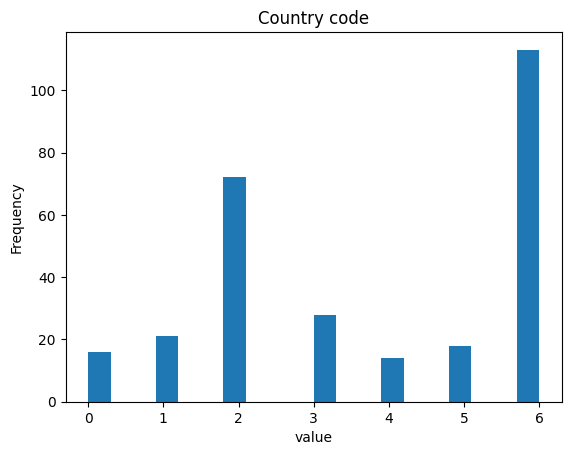

In [17]:
X['src_ip_country_code'].plot(kind='hist',bins=20)
plt.title('Country code')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show()

In [18]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled


array([[-0.28821898, -0.28122272, -0.45252816, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28210833, -0.26080425,  0.6368506 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.28268922, -0.27934434,  0.01434845, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 5.79640323,  5.80278149, -0.29690262, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28818663, -0.28466509, -0.14127708, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28739087, -0.30923327, -0.60815369, ...,  0.        ,
         0.        ,  0.        ]])

In [19]:
x_train,x_test=train_test_split(X_scaled,test_size=0.2,random_state=44)
model=IsolationForest(contamination=0.1,random_state=32)
model.fit(x_train)

IsolationForest(contamination=0.1, random_state=32)

In [20]:
y_predict=model.fit_predict(x_test)
y_predict

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [21]:
y_predict=[ 1 if x==1 else 0 for x in y_predict]
y_predict

[1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [22]:
y_test=[1]*len(y_predict)
print("clasification report:- ")
print(classification_report(y_test,y_predict))

clasification report:- 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.89      0.94        57

    accuracy                           0.89        57
   macro avg       0.50      0.45      0.47        57
weighted avg       1.00      0.89      0.94        57



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
